In [ ]:
"""
**What is ARIMA?**
#AR(Autoregression): A statistical model is autoregressive if it predicts future
values based on past values. We can say Autoregression model's order as p.
It means we are using p'th days ago data to predict future value.

#MA(Movingaverage): Rather than using past values of the forecast variable in a
regression, a moving average model uses past forecast errors. We can say
Movingaverage model's order is q. It means we use q'th days ago data to predict
future value. MA uses error(white noise). 'White noise' means there is no more
informative error remains in the residual. It means we cannot further extract
more data from our error(It also means there is no pattern).

#ARMA : Combination of AR and MA.

#ARIMA(Autoregressive integrated moving average): Used for stationary data. I
indicats how many times we do differencing. So its parameters are p, q, d which
are order of AR, MA and differencing.


**What is stationary?**
#'Stationary process' refer to process(sequence of datas) where mean stays same,
variance also stays same.


**What if data is non-staionary, can we not use ARIMA?**
#We can transform non-stationary data into stationary data by differencing t'th
day data and t-n'th day data and then can use that transformed data.


**What is ACF and PACF?**
#They can be used to determine whether we should use AR, or MA, or ARIMA based on
sample's behavior. It means we can use ACF and PACF to check how stationary the
given datas are.

#ACF(Autocorrelation function) : Check how much value of t-n'th day's ago data affects
value of t'th days data. Tells us correlation of values of t-n'th day and t'th
day. In that sense, there might be some indirect effect that would affect
corrleation between t-n day and t'th day, for example maybe t-1 day value can
hugely affect t'th day value, but we don't know it so we can just conclude t-n
day data is good predictor for predicting t'th day value.

#PACF(Partial autocorrelation function) : Takes away all indirect affect from ACF.
So can precisely examine how much t-n day's ago data affects value of t'th days
data directly.

#Non-stationary datas tend to show die out(slowly decreases) in ACF plot as we
keep increases the lag. In PACF it also die out. But in stationary datas, ACF plot
shows cut off.


**What do you mean die out in ACF and PACF plot?**
#As its name implies, ACF checks correlation between t'th day data and t-lag
day data of its own. And die out means autocorrleation(correlation of itself)
decreasing gradually as lag increases.


**How can we stationary by ACF?**
#If value cut off after lag 2 in ACF plot, then we can say that is stationary.
Otherwise, non-stationary.


**What is Box-Jenkins ARIMA procedure?**
#It simply can be thought as process of how to apply ARIMA to given data. The
order is as follows:
Data preprocessing -> Identify Model(whether you would use AR, MA, ARIMA)
-> Estimate parameter(p, q, d which are order of each model) -> Diagnose model
-> Use model to forcast.

src :
https://people.duke.edu/~rnau/411arim.htm
all code from : https://www.youtube.com/watch?v=rdR2fNDq6v0&t=711s (korean)

"""

"\n**What is ARIMA?**\n#AR(Autoregression): A statistical model is autoregressive if it predicts future\nvalues based on past values. We can say Autoregression model's order as p.\nIt means we are using p'th days ago data to predict future value.\n\n#MA(Movingaverage): Rather than using past values of the forecast variable in a\nregression, a moving average model uses past forecast errors. We can say\nMovingaverage model's order is q. It means we use q'th days ago data to predict\nfuture value. MA uses error(white noise). 'White noise' means there is no more\ninformative error remains in the residual. It means we cannot further extract\nmore data from our error(It also means there is no pattern).\n\n#ARMA : Combination of AR and MA.\n\n#ARIMA(Autoregressive integrated moving average): Used for stationary data. I\nindicats how many times we do differencing. So its parameters are p, q, d which\nare order of AR, MA and differencing.\n\n\n**What is stationary?**\n#'Stationary process' refe

In [ ]:
import os
import pandas as pd
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import seaborn as sns

import itertools

<ipython-input-2-acb6ffabd5a6>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
# Use AriPassengers.csv data. It can be obtained from google search.
data = pd.read_csv("/content/AirPassengers.csv")
data = data.rename(columns={'value':'passengers'})
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


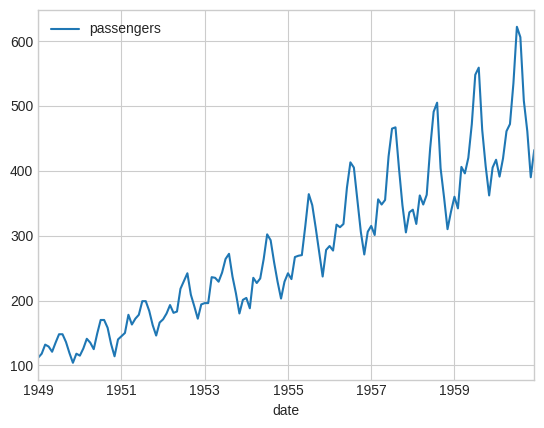

In [ ]:
# We first need to preprocess our data as Box-Jenkins procedure.
# Our data is non-stationary as shown in plot. We need differencing process.
fig = data.plot()

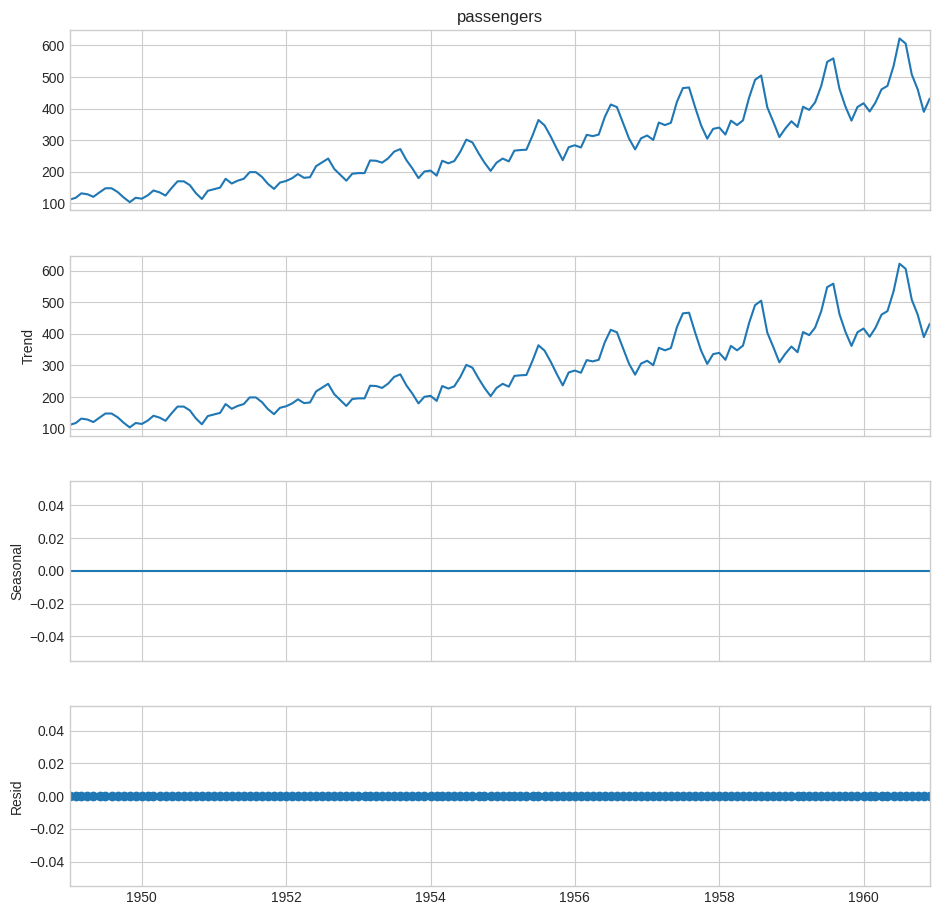

In [ ]:
"""
**Conduct seasonal decomposition. Why?**
#To see what components make up our data's time series. The goal of seasonal
decomposition is to break down Trend, Seasonality, Residuals.

#Trend:Long-term progression of the series. It shows how the data moves up or
down over time, ignoring short-term fluctuations.

#Seasonality: Regular patterns or cycles of fluctuation within specific periods
(daily, monthly, yearly) that repeat over time.

#Residual: Remainder(r.v. or noise) after we decompose trend and seasonality.


**What are methods for seasonal decomposition?
#Additive: Used when the seasonal variations are roughly constant over time.
The original time series is expressed as the sum of the trend, seasonal, and
residual components.

#Multiplicative: Used when the seasonal variations change proportionally to the
level of the time series. The original time series is expressed as the product
of the trend, seasonal, and residual components.
"""

# Here, we used additive.
decomp = sm.tsa.seasonal_decompose(data['passengers'], model='additive', period=1)
fig = decomp.plot()
fig.set_size_inches(10,10)
plt.show()

In [ ]:
# Now we identigy model
# Since it is time-series data we set shuffle as False
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [ ]:
# Check shape of data
print(type(train_data))
print(train_data.shape)
#train_data

<class 'pandas.core.frame.DataFrame'>
(115, 1)


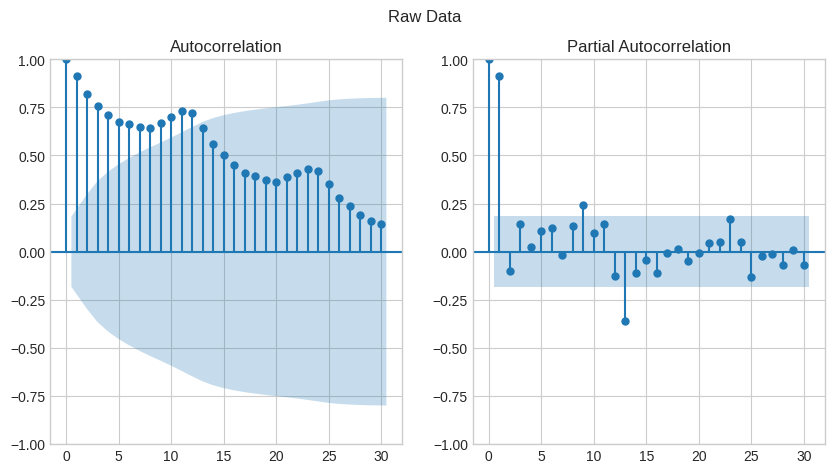

In [ ]:
"""
**Why there is redundant dimension when we see train_data?**
#Since it is a dataframe, which has 115 rows and 1 columns, python consider it as
2d array. Dataframe is essentialy 2d array no mater how columns and rows it has.
So even our original data has only one column, since dataframe is 2d array
consists of columns and rows, it is still 2d array.
"""

# Draw ACF and PACF plot to see our data's autocorrelation.
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle("Raw Data")
# Since 'train_data.values' has redundant dimension(it is now 2d), we squeeze(reduce to 1d) it.
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=30, ax=ax[1]);

In [ ]:
# We now need to do differencing to make non-stationary to stationary.
diff_train_data = train_data.copy()
diff_train_data = diff_train_data['passengers'].diff()
# Since we are differencing from t+1'th day to t'th day, there would be no value
# in first day(where there is not t-1'th day in data).
diff_train_data = diff_train_data.dropna()
print("\n Raw Data ######### \n ")
print(train_data)
print("\n Diff Data ######### \n ")
print(diff_train_data)


 Raw Data ######### 
 
            passengers
date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1958-03-01         362
1958-04-01         348
1958-05-01         363
1958-06-01         435
1958-07-01         491

[115 rows x 1 columns]

 Diff Data ######### 
 
date
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1958-03-01    44.0
1958-04-01   -14.0
1958-05-01    15.0
1958-06-01    72.0
1958-07-01    56.0
Name: passengers, Length: 114, dtype: float64


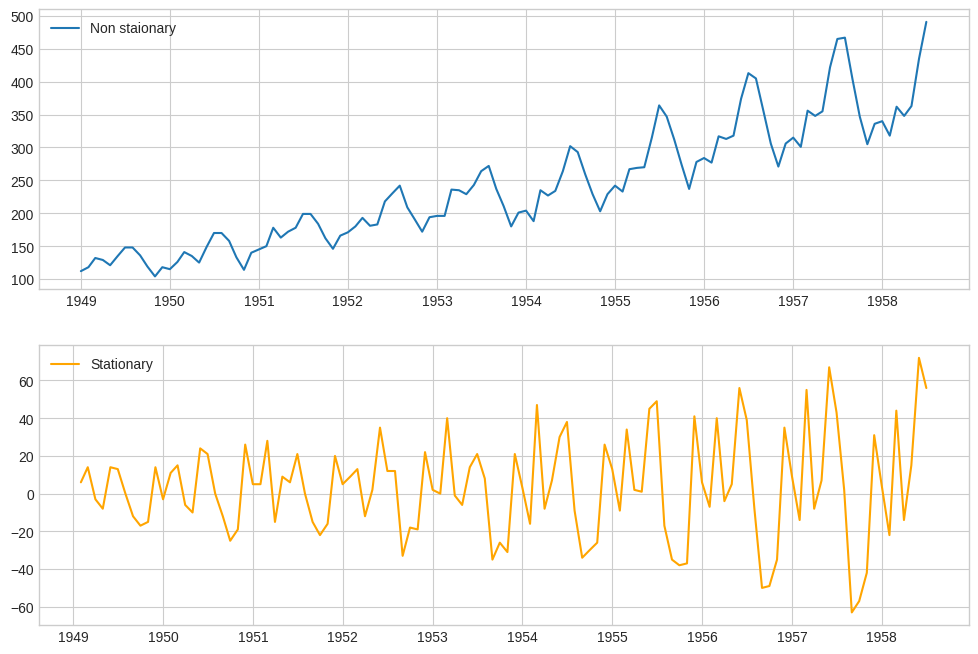

In [ ]:
# Plot data, so we can see differencing worked well
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(train_data['passengers'])
plt.legend(["Non staionary"])
plt.subplot(212)
plt.plot(diff_train_data, 'orange')
plt.legend(["Stationary"])
plt.show()

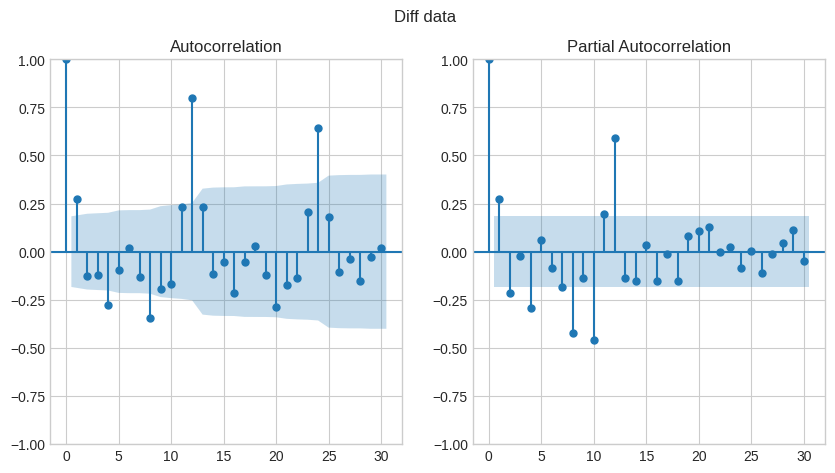

In [ ]:
# Plot ACF, PACF
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle("Diff data")
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=30, ax=ax[1]);

In [ ]:
# Let's fit data to model. Since we have made diff_train_data seperately, ARIMA
# model from statsmodel automatically conduct differencing when 'I' parameter is
# given, we can use 'train_data'.
model = ARIMA(train_data.values, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  115
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -532.268
Date:                Fri, 12 Apr 2024   AIC                           1068.536
Time:                        16:21:42   BIC                           1074.008
Sample:                             0   HQIC                          1070.757
                                - 115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2904      0.089      3.278      0.001       0.117       0.464
sigma2       664.7320     89.253      7.448      0.000     489.800     839.664
Ljung-Box (L1) (Q):                   0.32   Jarque-

In [ ]:
# Find which parameter(order) is best for ARIMA.
p = range(0,3)
d = range(1,2)
q = range(0,3)
# Under code genereates list of pair of p, d, q. You can think it as combination
# of possible three-pair(triplets) of p, d, q
pdq = list(itertools.product(p,d,q))

aic = []
for i in pdq:
  model = ARIMA(train_data.values, order=(i))
  model_fit = model.fit()
  model_aic = model_fit.aic.round(2)
  print(f"ARIMA:{i} >> AIC : {model_aic}")
  aic.append(model_aic)

ARIMA:(0, 1, 0) >> AIC : 1076.27
ARIMA:(0, 1, 1) >> AIC : 1063.65
ARIMA:(0, 1, 2) >> AIC : 1060.69
ARIMA:(1, 1, 0) >> AIC : 1068.54
ARIMA:(1, 1, 1) >> AIC : 1058.25
ARIMA:(1, 1, 2) >> AIC : 1057.33
ARIMA:(2, 1, 0) >> AIC : 1065.64
ARIMA:(2, 1, 1) >> AIC : 1058.65
ARIMA:(2, 1, 2) >> AIC : 1057.52


In [ ]:
# Find optimal parameter. We can easily find smallest aic by min function, but
# what we also want is parameter(ordere of p,d,q).
optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((1, 1, 2), 1057.33)]

In [ ]:
model_opt = ARIMA(train_data.values, order=optimal[0][0])
model_opt_fit = model_opt.fit()

In [ ]:
print(model_opt_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  115
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -524.664
Date:                Fri, 12 Apr 2024   AIC                           1057.328
Time:                        16:21:43   BIC                           1068.272
Sample:                             0   HQIC                          1061.769
                                - 115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5387      0.128      4.219      0.000       0.288       0.789
ma.L1         -0.2053      0.122     -1.688      0.091      -0.444       0.033
ma.L2         -0.5606      0.084     -6.647      0.0

In [ ]:
pred = model_opt_fit.forecast(len(test_data))
pred

array([482.49384085, 450.83165339, 433.77578039, 424.58807647,
       419.6388192 , 416.97273988, 415.53656904, 414.76292864,
       414.34618193, 414.12168768, 414.00075651, 413.93561298,
       413.90052128, 413.88161799, 413.87143512, 413.86594978,
       413.86299492, 413.86140319, 413.86054576, 413.86008387,
       413.85983506, 413.85970103, 413.85962883, 413.85958994,
       413.85956899, 413.8595577 , 413.85955162, 413.85954835,
       413.85954658])

In [ ]:
# Now use ARIMA to forecast
pred = model_opt_fit.forecast(len(test_data))
pred_val = pred
pred_ub = min(pred) # upper bound of estimation
pred_lb = max(pred) # lower bound of estimation
pred_idx = list(test_data.index)
r2 = r2_score(test_data, pred_val)

<function matplotlib.pyplot.show(close=None, block=None)>

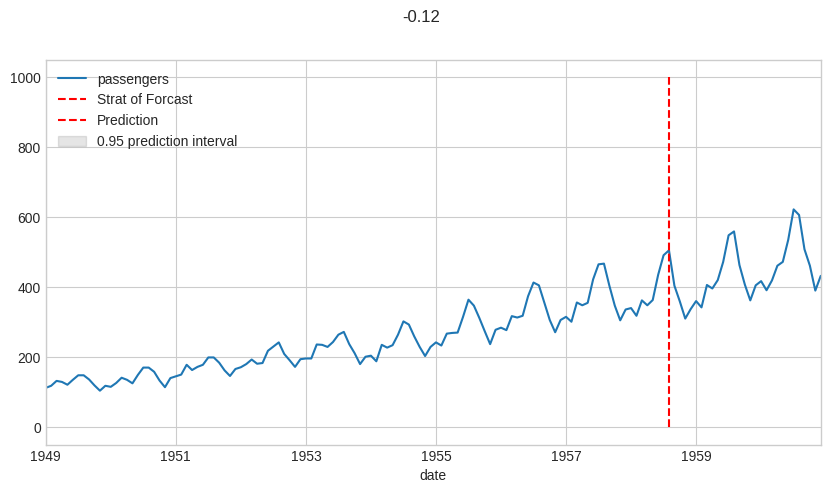

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
data.plot(ax=ax);
ax.vlines('1958-08-01', 0, 1000, linestyle='--', color='r', label='Strat of Forcast')
ax.plot(pred_idx, pred_val, linestyle='--', color='r', label='Prediction')
ax.fill_between(pred_idx, pred_lb, pred_ub, color='k', alpha=0.1, label='0.95 prediction interval')
ax.legend(loc='upper left')
plt.suptitle(f'{round(r2, 2)}')
plt.show

# SNP

In [ ]:
df_snp_data = pd.read_excel("/content/SnP_Global_1200_Information_Technology_and_Interactive_Media_Services_Index.xls")

In [ ]:
df_snp_data.columns

Index(['Effective date ', 'S&P Global 1200 Information Technology and Interactive Media & Services Index (USD)'], dtype='object')

In [ ]:
df_snp_data=df_snp_data.rename(columns={'Effective date ':'date','S&P Global 1200 Information Technology and Interactive Media & Services Index (USD)':'price'})
df_snp_data.head()

,date,price
0,2018-08-15,1000.00
1,2018-08-16,1001.18
2,2018-08-17,1004.48
3,2018-08-20,1005.39
4,2018-08-21,1007.44


In [ ]:
df_snp_data.columns

Index(['date', 'price'], dtype='object')

<Axes: >

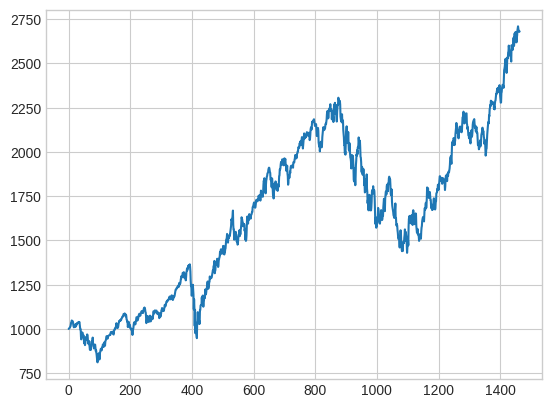

In [ ]:
snp_data_price = df_snp_data['price']
snp_data_price.plot()

In [ ]:
from sklearn.model_selection import train_test_split
df_snp_data_train, df_snp_data_test = train_test_split(snp_data_price, test_size=0.3, shuffle=False)

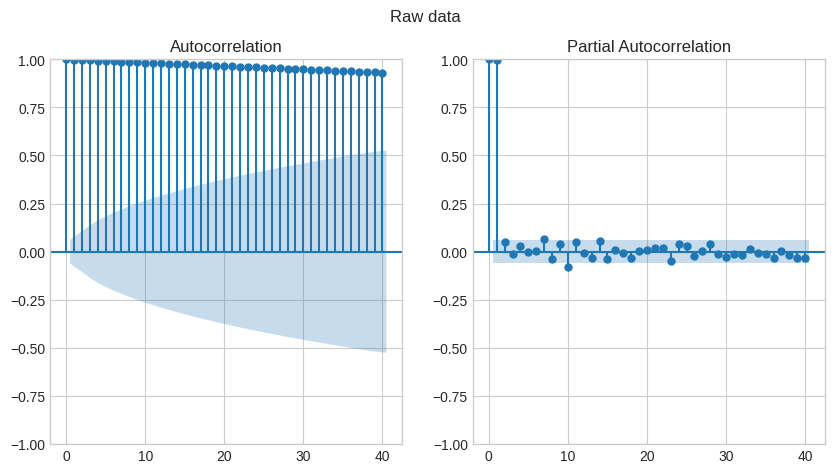

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle("Raw data")
sm.graphics.tsa.plot_acf(df_snp_data_train.values.squeeze(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_snp_data_train.values.squeeze(), lags=40, ax=ax[1]);

In [ ]:
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p,d,q))

aic = []
for i in pdq:
  model = ARIMA(df_snp_data_train.values, order=(i))
  model_fit = model.fit()
  model_aic = model_fit.aic.round(2)
  print(f"ARIMA:{i} >> AIC : {model_aic}")
  aic.append(model_aic)

ARIMA:(0, 1, 0) >> AIC : 9282.52
ARIMA:(0, 1, 1) >> AIC : 9279.57
ARIMA:(0, 1, 2) >> AIC : 9280.21
ARIMA:(1, 1, 0) >> AIC : 9279.22
ARIMA:(1, 1, 1) >> AIC : 9279.84
ARIMA:(1, 1, 2) >> AIC : 9281.64
ARIMA:(2, 1, 0) >> AIC : 9279.95
ARIMA:(2, 1, 1) >> AIC : 9281.66
ARIMA:(2, 1, 2) >> AIC : 9258.9


In [ ]:
optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((2, 1, 2), 9258.9)]

In [ ]:
model_opt_snp = ARIMA(df_snp_data_train.values, order=optimal[0][0])
model_opt_snp_fit = model_opt_snp.fit()

In [ ]:
print(model_opt_snp_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1024
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4624.451
Date:                Fri, 12 Apr 2024   AIC                           9258.902
Time:                        16:21:52   BIC                           9283.554
Sample:                             0   HQIC                          9268.261
                               - 1024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6212      0.034    -47.383      0.000      -1.688      -1.554
ar.L2         -0.9010      0.032    -28.150      0.000      -0.964      -0.838
ma.L1          1.5775      0.035     45.402      0.0

In [ ]:
# Now use ARIMA to forecast
pred = model_opt_snp_fit.forecast(len(df_snp_data_test))
len(pred)

440

In [ ]:
len(snp_data_price)

1464

In [ ]:
for i in range(len(df_snp_data_test)):
  diff = snp_data_price[len(snp_data_price)-440+i] - pred[i]
  print(diff)